# Final Project Submission

Please fill out:
* Student name: Miguel Santana
* Student pace: Full Time
* Scheduled project review date/time: TBA
* Instructor name: James Irving
* Blog post URL: TBA

# Data Analysis and Modeling
OSEMN Framework

* Obtain
* Scrub
* Explore
* Model
* INterpret

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import os
pd.set_option('display.max_columns', 50)

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Obtain

## Data Frame

In [2]:
df = pd.read_csv('churn_dataset.csv')

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Scrub

## Datatypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Null Data

In [5]:
df.isnull().values.any() # Checking for nulls

False

## Duplicates

In [6]:
# Checking for duplicated values in the unique "identifier" column
df['phone number'].duplicated().values.any() 

False

## Misentered Data

In [7]:
for col in df.columns: # Preliminary view of value counts per column
    try:
        print(col, df[col].value_counts()[:10])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print 
        # statement will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

state WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
WY     77
VA     77
CT     74
Name: state, dtype: int64


account length 105    43
87     42
93     40
101    40
90     39
86     38
95     38
116    37
100    37
112    36
Name: account length, dtype: int64


area code 415    1655
510     840
408     838
Name: area code, dtype: int64


phone number 348-5569    1
332-2889    1
331-1391    1
358-5721    1
348-7409    1
419-7415    1
391-2334    1
411-5334    1
344-5973    1
360-3126    1
Name: phone number, dtype: int64


international plan no     3010
yes     323
Name: international plan, dtype: int64


voice mail plan no     2411
yes     922
Name: voice mail plan, dtype: int64


number vmail messages 0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
Name: number vmail messages, dtype: int64


total day minutes 174.5    8
159.5    8
154.0    8
175.4    7
162.3    7
        ..
199.9    1
105.8    1
125.

# Exploratory Data Analysis

## Exploring Customer Churn

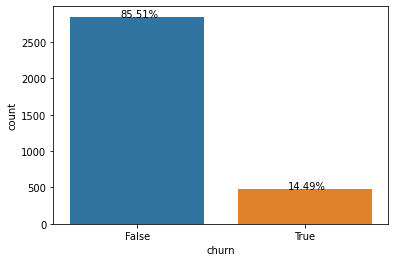

In [8]:
# Observing target "churn"
ax=sns.countplot(x='churn',data=df)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x()+0.3, p.get_height()))

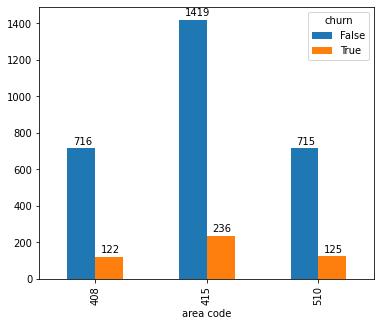

In [9]:
# Visualizing target by area code
ac = df.groupby(['area code', 'churn']).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ac.patches:
    ac.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

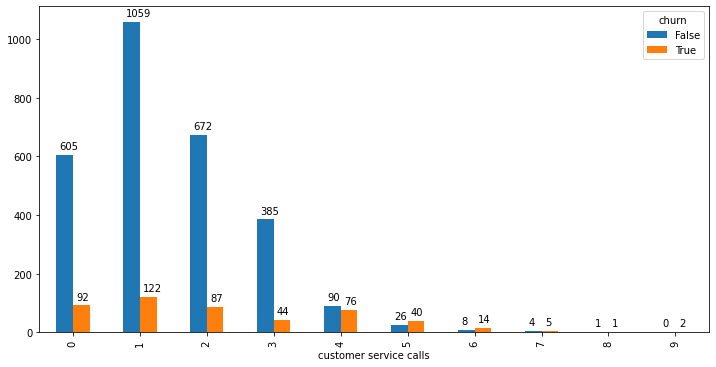

In [10]:
# Visualizing target by number of customer service calls
cs = df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(12,6))
for i in cs.patches:
    cs.text(i.get_x()+0.05, i.get_height()+20,int(i.get_height()))

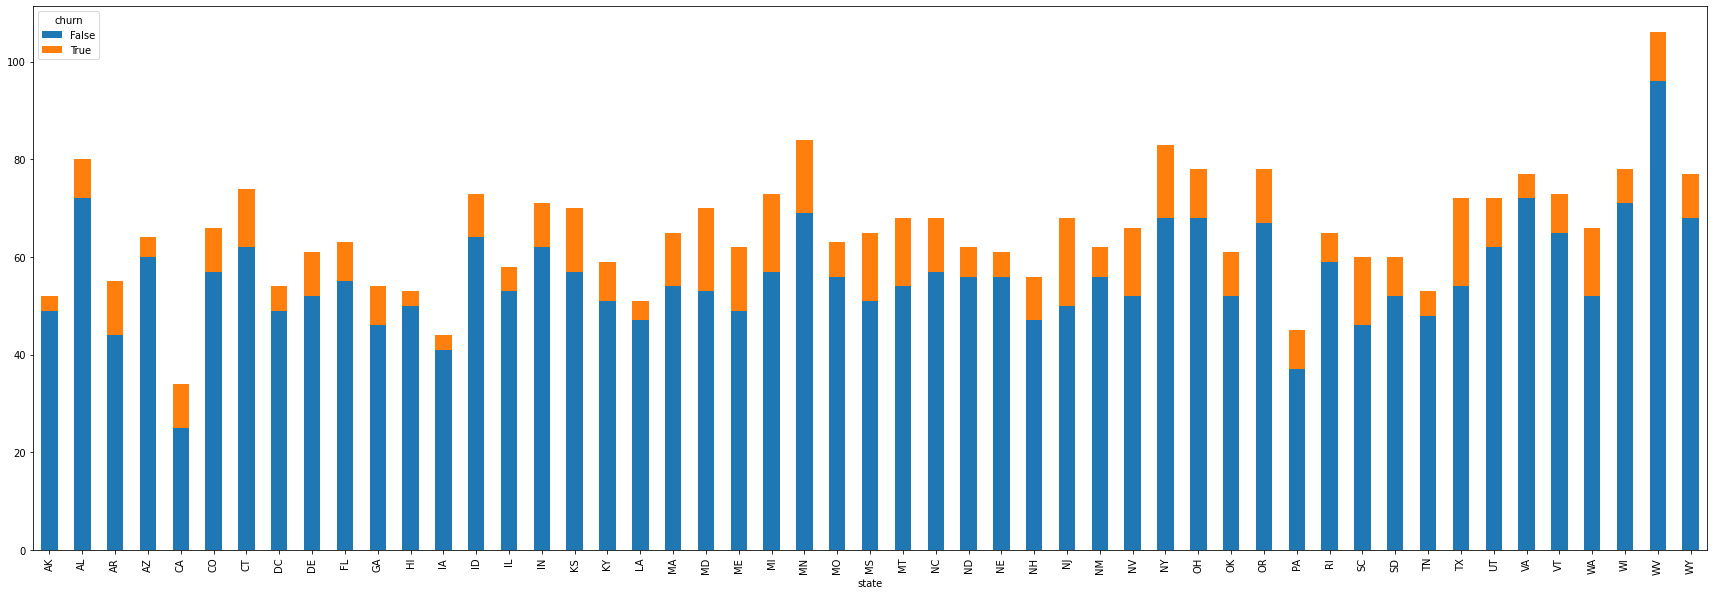

In [11]:
# Visualizing target by state
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)); # churn by state

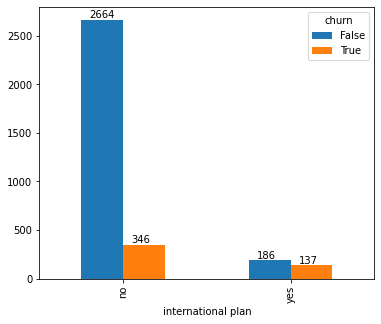

In [12]:
# Visualizing target by existance of international plan
ip=df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ip.patches:
    ip.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

## Observing Account Length

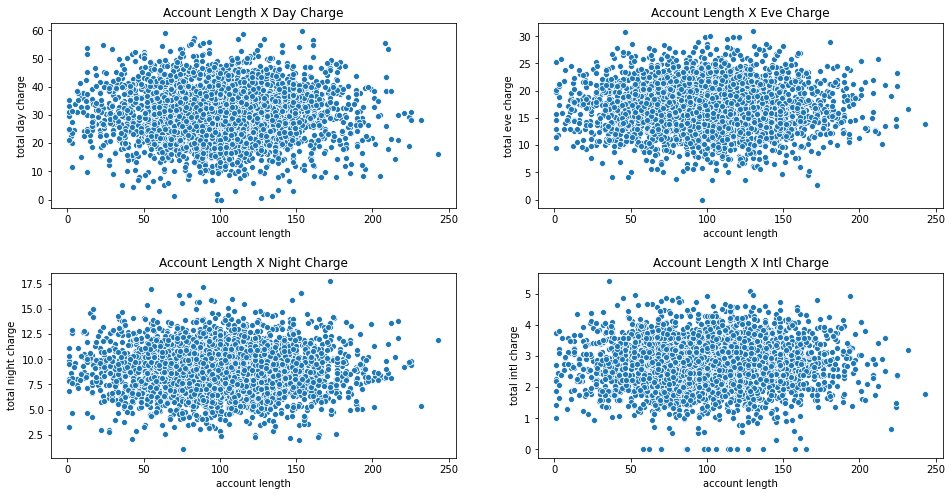

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.scatterplot(df['account length'], df['total day charge'])
plt.title('Account Length X Day Charge')

plt.subplot(222)
sns.scatterplot(df['account length'], df['total eve charge'])
plt.title('Account Length X Eve Charge')

plt.subplot(223)
sns.scatterplot(df['account length'], df['total night charge'])
plt.title('Account Length X Night Charge')

plt.subplot(224)
sns.scatterplot(df['account length'], df['total intl charge'])
plt.title('Account Length X Intl Charge')

plt.subplots_adjust(hspace=0.35)
plt.show()

# Data Preparation

## Feature Engineering

In [14]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Column Names

In [16]:
# converting floats to integers 
floatcols = ['total day minutes', 'total day charge', 'total eve minutes', 
             'total eve charge', 'total night minutes', 'total night charge', 
             'total intl minutes', 'total intl charge', 'total charge']

for col in floatcols:
    df[col] = df[col].astype('int')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge
0,KS,128,415,382-4657,no,yes,25,265,110,45,197,99,16,244,91,11,10,3,2,1,False,75
1,OH,107,415,371-7191,no,yes,26,161,123,27,195,103,16,254,103,11,13,3,3,1,False,59
2,NJ,137,415,358-1921,no,no,0,243,114,41,121,110,10,162,104,7,12,5,3,0,False,62
3,OH,84,408,375-9999,yes,no,0,299,71,50,61,88,5,196,89,8,6,7,1,2,False,66
4,OK,75,415,330-6626,yes,no,0,166,113,28,148,122,12,186,121,8,10,3,2,3,False,52


In [17]:
# cleaning column names
subs = [(' ', '_'),('.0','')]

def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

## Multicollinearity

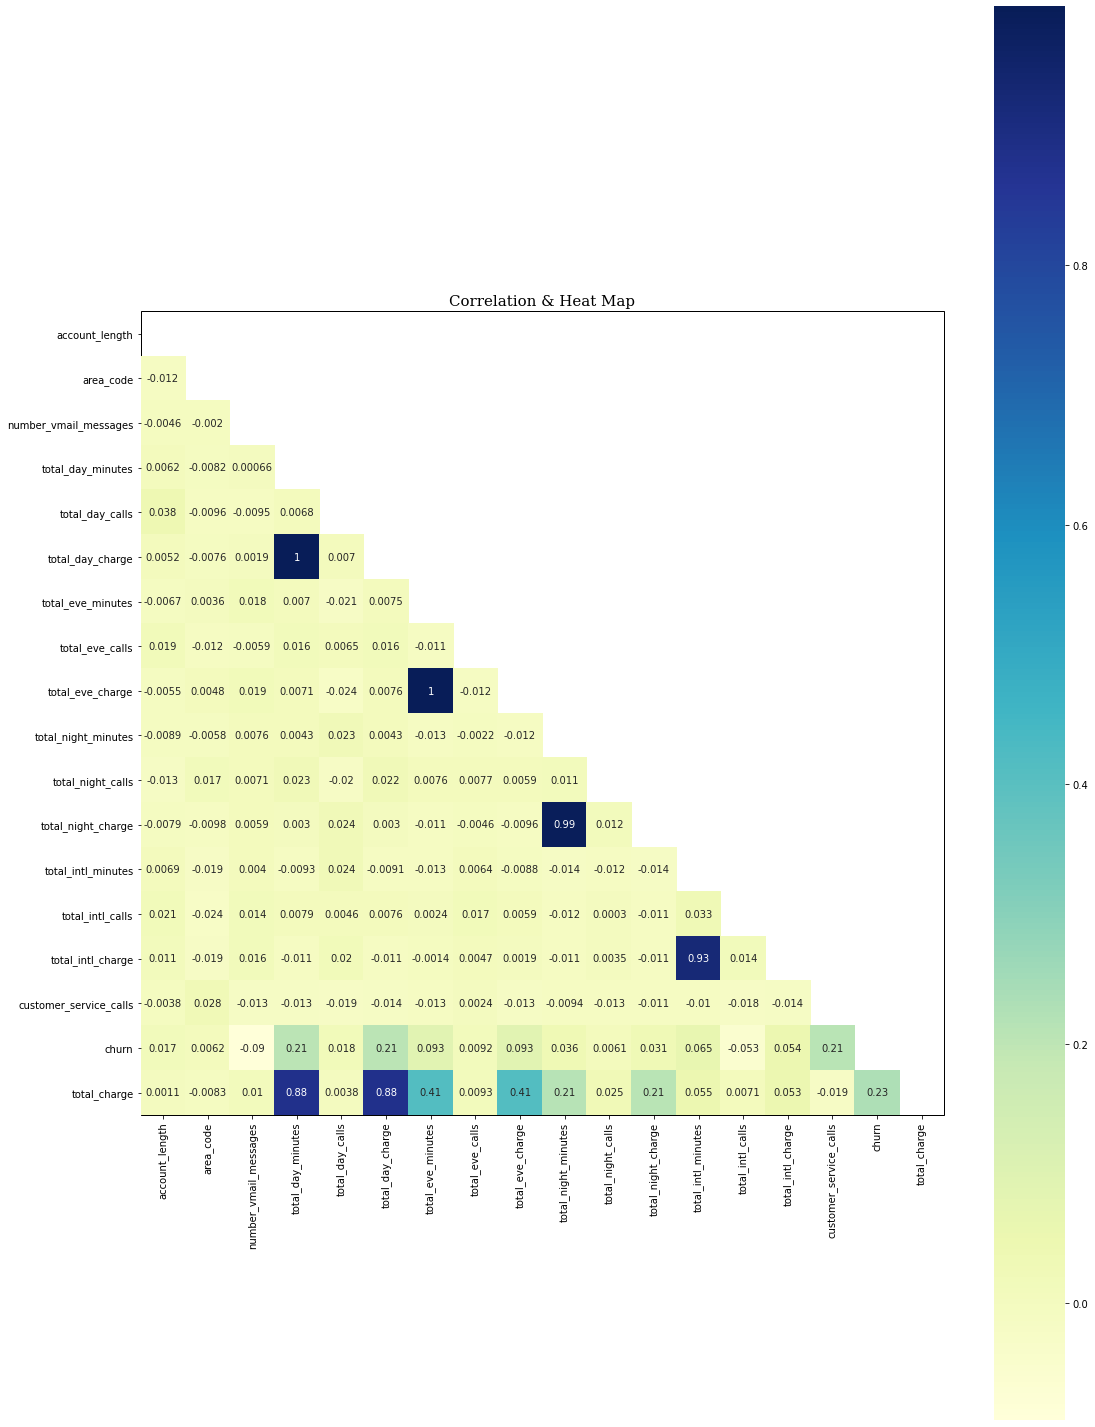

In [18]:
corr = df.corr() # analyzing correlation
# corr
fig, ax = plt.subplots(figsize=(18,26))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
#xticklabels=labels, yticklabels=labels)
#plt.xticks(rotation=-45, fontsize=16)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Correlation & Heat Map", fontsize=15, fontfamily="serif")
plt.show()

<div class="alert alert-success">

Strong correlation between the "total day" categories and total charge. Lesser relationship with "total eve" categories with an even weaker relationship with "total night" categories.

</div>

## Dropping Features

In [19]:
# Drop "charge" categories to address multicollinearity as well as 
# the phone number (identifier) column

# df = df.drop(['phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1)
df.drop(df.columns[[3,9,12,15,18]], axis=1, inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn,total_charge
0,KS,128,415,no,yes,25,265,110,197,99,244,91,10,3,1,False,75
1,OH,107,415,no,yes,26,161,123,195,103,254,103,13,3,1,False,59
2,NJ,137,415,no,no,0,243,114,121,110,162,104,12,5,0,False,62
3,OH,84,408,yes,no,0,299,71,61,88,196,89,6,7,2,False,66
4,OK,75,415,yes,no,0,166,113,148,122,186,121,10,3,3,False,52


## Categorical Encoding

### Casting Datatypes 

In [20]:
# Selecting the numerical columns for observation
catfeats = df.select_dtypes('object').columns 
catfeats

Index(['state', 'international_plan', 'voice_mail_plan'], dtype='object')

<div class="alert alert-success">

Encoding our categorical data using a label encoder to avoid the issue of having 50 states one hot encoded. 

</div>

In [22]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### Label Encoding

In [23]:
label_encoder = preprocessing.LabelEncoder()

In [24]:
# encoding categorical variables
df['state'] = label_encoder.fit_transform(df['state'])
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   state                   3333 non-null   int64
 1   account_length          3333 non-null   int64
 2   area_code               3333 non-null   int64
 3   international_plan      3333 non-null   int64
 4   voice_mail_plan         3333 non-null   int64
 5   number_vmail_messages   3333 non-null   int64
 6   total_day_minutes       3333 non-null   int64
 7   total_day_calls         3333 non-null   int64
 8   total_eve_minutes       3333 non-null   int64
 9   total_eve_calls         3333 non-null   int64
 10  total_night_minutes     3333 non-null   int64
 11  total_night_calls       3333 non-null   int64
 12  total_intl_minutes      3333 non-null   int64
 13  total_intl_calls        3333 non-null   int64
 14  customer_service_calls  3333 non-null   int64
 15  churn                

In [25]:
# One Hot Encoding Churn
dummy_column = ['churn']

df = pd.get_dummies(df, columns = dummy_column)

In [26]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,total_charge,churn_False,churn_True
0,16,128,415,0,1,25,265,110,197,99,244,91,10,3,1,75,1,0
1,35,107,415,0,1,26,161,123,195,103,254,103,13,3,1,59,1,0
2,31,137,415,0,0,0,243,114,121,110,162,104,12,5,0,62,1,0
3,35,84,408,1,0,0,299,71,61,88,196,89,6,7,2,66,1,0
4,36,75,415,1,0,0,166,113,148,122,186,121,10,3,3,52,1,0


# Model

### Test/Train Split

In [27]:
# Separate target and features
y = df['churn_True']
X = df.drop(['churn_False', 'churn_True'], axis=1) 

In [28]:
# standardize the data
scaler = StandardScaler() # transform "X" features
X_scaled = scaler.fit_transform(X)

In [29]:
# Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) 

## Logistic Regression

In [30]:
%%time 
# observing time lapse - running classifiers

# logistic regression classifier
# liblinear supports l2 regularization
lr = LogisticRegression(penalty='l2', solver='liblinear') 

# Fit the model
fit = lr.fit(X_train, y_train)

pred_y = lr.predict(X_test) 

lrs = round(lr.score(X_test, y_test)*100,2) # format accuracy score
print('\nAccuracy Percentage:', lrs)


Accuracy Percentage: 86.81
CPU times: user 6.26 ms, sys: 930 µs, total: 7.19 ms
Wall time: 6.22 ms


### Logistic Regression Evaluation

In [31]:
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y))


Actual vs. Predicted 

Predicted    0   1  All
True                   
0          561  18  579
1           70  18   88
All        631  36  667



               precision    recall  f1-score   support

           0       0.89      0.97      0.93       579
           1       0.50      0.20      0.29        88

    accuracy                           0.87       667
   macro avg       0.69      0.59      0.61       667
weighted avg       0.84      0.87      0.84       667



## Catboost

The name Catboost comes from Categorical Boosting. Catboost is a library that uses gradient boosting and is successful with a diverse range of data types

In [32]:
#pip install catboost

In [33]:
%%time 
from catboost import CatBoostClassifier # Import library
catmodel = CatBoostClassifier(
    custom_loss=['Accuracy'], # Metric to use in training
    random_seed=0, # Consistent with other random seeds
    logging_level='Silent' # We already have the time function to show time elapsed
)
catmodel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    plot=False
); #fit model

catscore = round(catmodel.score(X_test, y_test) * 100, 2) #round score 
print('\nAccuracy Percentage:', catscore)


Accuracy Percentage: 97.75
CPU times: user 27.4 s, sys: 1.53 s, total: 28.9 s
Wall time: 2.83 s


In [34]:
pred_y_cat = catmodel.predict(X_test)
print('\nActual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_cat, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_cat))


Actual vs. Predicted 

Predicted    0   1  All
True                   
0          575   4  579
1           11  77   88
All        586  81  667



               precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.95      0.88      0.91        88

    accuracy                           0.98       667
   macro avg       0.97      0.93      0.95       667
weighted avg       0.98      0.98      0.98       667



## K-Nearest Neighbors

In [35]:
%%time 

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) #fit model

knn_score = round(knn.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', knn_score)


Accuracy Percentage: 91.9
CPU times: user 58.9 ms, sys: 819 µs, total: 59.8 ms
Wall time: 59.2 ms


In [36]:
pred_y_knn = knn.predict(X_test) 

print('\n Actual vs. Predicted \n') # Confusion matrix
print(pd.crosstab(y_test, pred_y_knn, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_knn)) #took atleast 45 minutes


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          571   8  579
1           46  42   88
All        617  50  667



               precision    recall  f1-score   support

           0       0.93      0.99      0.95       579
           1       0.84      0.48      0.61        88

    accuracy                           0.92       667
   macro avg       0.88      0.73      0.78       667
weighted avg       0.91      0.92      0.91       667



## Support Vector Machine

In [37]:
%%time 

# Linear SVC/SupportVectorMachine 
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
linear_svc_score = round(linear_svc.score(X_test, y_test) * 100, 2) #round score
print('\nAccuracy Percentage:', linear_svc_score)


Accuracy Percentage: 87.11
CPU times: user 116 ms, sys: 1.36 ms, total: 118 ms
Wall time: 116 ms


/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [38]:
%%time 

pred_y_svc = linear_svc.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_svc, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_svc))


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          568  11  579
1           75  13   88
All        643  24  667



               precision    recall  f1-score   support

           0       0.88      0.98      0.93       579
           1       0.54      0.15      0.23        88

    accuracy                           0.87       667
   macro avg       0.71      0.56      0.58       667
weighted avg       0.84      0.87      0.84       667

CPU times: user 29.8 ms, sys: 2.08 ms, total: 31.9 ms
Wall time: 30.2 ms


## Gaussian Naive Bayes

In [39]:
%%time 

clf = GaussianNB() #gaissian naive bayes
clf.fit(X_train, y_train) #fit the model

clf_score = round(clf.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_score)

Accuracy Percentage:  85.46
CPU times: user 2.33 ms, sys: 876 µs, total: 3.21 ms
Wall time: 2.51 ms


In [40]:
pred_y_clf = clf.predict(X_test) #y predicted

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_clf, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf))


 Actual vs. Predicted 

Predicted    0    1  All
True                    
0          520   59  579
1           38   50   88
All        558  109  667



               precision    recall  f1-score   support

           0       0.93      0.90      0.91       579
           1       0.46      0.57      0.51        88

    accuracy                           0.85       667
   macro avg       0.70      0.73      0.71       667
weighted avg       0.87      0.85      0.86       667



## Decision Tree

In [41]:
%%time 

decision_tree = DecisionTreeClassifier()# Decision Tree 
decision_tree.fit(X_train, y_train) #fit the model
decision_tree_score = round(decision_tree.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", decision_tree_score)

Accuracy Percentage:  95.05
CPU times: user 15.5 ms, sys: 818 µs, total: 16.3 ms
Wall time: 15.5 ms


In [42]:
pred_y_decision_tree = decision_tree.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab(y_test, pred_y_decision_tree, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_decision_tree))


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          557  22  579
1           11  77   88
All        568  99  667



               precision    recall  f1-score   support

           0       0.98      0.96      0.97       579
           1       0.78      0.88      0.82        88

    accuracy                           0.95       667
   macro avg       0.88      0.92      0.90       667
weighted avg       0.95      0.95      0.95       667



## Random Forest

In [43]:
%%time 

random_forest = RandomForestClassifier(n_estimators=100) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

Accuracy Percentage:  97.75
CPU times: user 292 ms, sys: 2.54 ms, total: 294 ms
Wall time: 294 ms


In [44]:
pred_y_random_forest = random_forest.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_random_forest, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_random_forest))


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          575   4  579
1           11  77   88
All        586  81  667



               precision    recall  f1-score   support

           0       0.98      0.99      0.99       579
           1       0.95      0.88      0.91        88

    accuracy                           0.98       667
   macro avg       0.97      0.93      0.95       667
weighted avg       0.98      0.98      0.98       667



## Gradient Boosting

In [45]:
%%time 


clf_gb = GradientBoostingClassifier(n_estimators=100, 
                                 max_depth=1, 
                                 random_state=0)
clf_gb.fit(X_train, y_train)
clf_gb_score = round(clf_gb.score(X_test, y_test) * 100, 2)
print("Accuracy Percentage: ", clf_gb_score)

Accuracy Percentage:  89.06
CPU times: user 63 ms, sys: 1 ms, total: 64 ms
Wall time: 63.2 ms


In [46]:
%%time 

pred_y_clf_gb = clf_gb.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_clf_gb, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_clf_gb))


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          554  25  579
1           48  40   88
All        602  65  667



               precision    recall  f1-score   support

           0       0.92      0.96      0.94       579
           1       0.62      0.45      0.52        88

    accuracy                           0.89       667
   macro avg       0.77      0.71      0.73       667
weighted avg       0.88      0.89      0.88       667

CPU times: user 30.8 ms, sys: 1.55 ms, total: 32.3 ms
Wall time: 31.2 ms


## Adaboost

In [47]:
%%time 

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), 
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X_train, y_train) #fit model
bdt_score = round(bdt.score(X_test, y_test) * 100, 2) #round score
print("Accuracy Percentage: ", bdt_score) #4:45

Accuracy Percentage:  96.1
CPU times: user 1.9 s, sys: 3.08 ms, total: 1.91 s
Wall time: 1.91 s


In [48]:
%%time 

pred_y_bdt = bdt.predict(X_test) 

print('\n Actual vs. Predicted \n') #confusion matrix
print(pd.crosstab( y_test, pred_y_bdt, rownames=['True'], colnames=['Predicted'], margins=True))

print('\n\n\n', classification_report(y_test, pred_y_bdt))


 Actual vs. Predicted 

Predicted    0   1  All
True                   
0          575   4  579
1           22  66   88
All        597  70  667



               precision    recall  f1-score   support

           0       0.96      0.99      0.98       579
           1       0.94      0.75      0.84        88

    accuracy                           0.96       667
   macro avg       0.95      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667

CPU times: user 48.4 ms, sys: 1.6 ms, total: 50 ms
Wall time: 48.9 ms


# Interpret Models

In [49]:
# results dataframe
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'KNN', 
              'Random Forest', 
              'Gaussian Naive Bayes',
              'Linear SVC (SVM)', 
              'Decision Tree', 
              'AdaBoostClassifier', 
              'GradientBoostingClassifier',
              'CatBoost',
             ],
    'Score': [lrs, 
              knn_score, 
              random_forest_score, 
              clf_score,
              linear_svc_score, 
              decision_tree_score,
              bdt_score, 
              clf_gb_score, 
              catscore,
             ]})

models.sort_values(by='Score', ascending=False) #sorting by score

,Model,Score
2,Random Forest,97.75
8,CatBoost,97.75
6,AdaBoostClassifier,96.10
5,Decision Tree,95.05
1,KNN,91.90
7,GradientBoostingClassifier,89.06
4,Linear SVC (SVM),87.11
0,Logistic Regression,86.81
3,Gaussian Naive Bayes,85.46


<div class="alert alert-success">

It looks like Catboost is the most accurate with Random Forest
coming in at close second followed by AdaBoost. The least accurate is 
Gaussian Naive Bayes coming in 12 percent lower than Catboost

</div>

## Random Forest Pipeline with GridSearchCV

Let's see if we can improve our results at all using GridSearch. Gridsearch will run and compare each combination of parameters in a set of parameters that we choose.

In [50]:
y_pipe = df['churn_True']
X_pipe = df.drop(['churn_False', 'churn_True'], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X_pipe, y_pipe, test_size=0.2, random_state=0)

In [51]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 

# Creating a pipeline
rf_pipe = Pipeline([('scl', StandardScaler()),
                 ('pca', PCA(n_components=5)), #arbitrary number
                 ('clf', RandomForestClassifier(random_state = 0))])


# Set grid search params
rf_grid_param = [ 
  {'clf__n_estimators': [100], 
   'clf__max_features': ['auto', 'sqrt'],
   'clf__max_depth': [None],  
   'clf__min_samples_leaf':[1, 2],   
   'clf__min_samples_split':[2, 10],
  }
]

# Construct grid search
rf_gridsearch = GridSearchCV(estimator=rf_pipe,
            param_grid=rf_grid_param,
            scoring='accuracy',
            cv=3, verbose=2)

# Fit using grid search
rf_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=2, clf__n_estimators=100, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100, total=   0.2s
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100 
[CV]  clf__max_depth=None, clf__max_features=auto, clf__min_samples_leaf=1, clf__min_samples_split=10, clf__n_estimators=100, total=   0.3s
[CV] clf__max_depth=None, clf__max_features=auto, clf__min_samples_l

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    5.8s finished


CPU times: user 42.2 s, sys: 238 ms, total: 42.4 s
Wall time: 6.13 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                      

In [52]:
# print best parameters
print('\nBest params:\n', rf_gridsearch.best_params_)


Best params:
 {'clf__max_depth': None, 'clf__max_features': 'auto', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


In [53]:
%%time 
#applying best parameters to model
random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 10) # random forest 
random_forest.fit(X_train, y_train) #fit the model
random_forest_score = round(random_forest.score(X_test, y_test) * 100, 2) #round the result
print("Accuracy Percentage: ", random_forest_score)

Accuracy Percentage:  97.6
CPU times: user 268 ms, sys: 1.52 ms, total: 270 ms
Wall time: 269 ms


<div class="alert alert-success">

Gridsearch CV did not raise the accuracy of the model. Let's see if we can improve the accuracy in some of our other models by addressing our class imbalance problem.

</div>

## Class Imbalance

Let's take a closer look at the breakdown of our target variable.

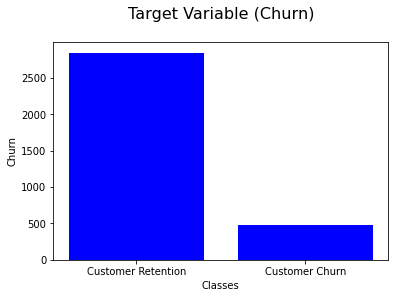

In [54]:
# visualizing churn
plt.bar(['Customer Retention', 'Customer Churn'], df.churn_True.value_counts().values, facecolor = 'blue',  linewidth=0.5)
plt.title('Target Variable (Churn)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Churn')
plt.show()

<div class="alert alert-success">

The graph above highlights that there is a a pretty high level of imbalance. We can remedy this using SMOTE.

</div>

## SMOTE (Synthetic Minority Over-sampling Technique)

In [55]:
# Separate target and features
y = df['churn_True'] # setting y variable
X = df.drop(['churn_False', 'churn_True'], axis=1) 

In [56]:
X_scaled = scaler.fit_transform(X) #scale data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0) #test/train split

In [58]:
from imblearn.over_sampling import SMOTE #import smote

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [59]:
smote = SMOTE(random_state=0) #random state 0 for consistency

In [60]:
%%time

X_res, y_res = smote.fit_resample(X_train, y_train) #fitting smote to our train sets

CPU times: user 16.1 ms, sys: 916 µs, total: 17 ms
Wall time: 16.1 ms


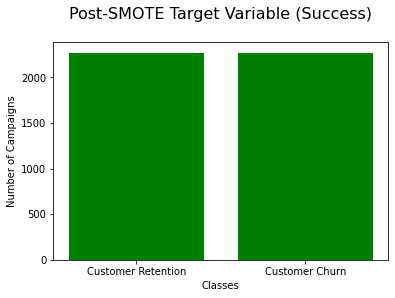

In [61]:
#updated bar graph to display amount of failed vs. successful campaigns post-SMOTE
plt.bar(['Customer Retention', 'Customer Churn'], [sum(y_res), len(y_res)-sum(y_res)], facecolor = 'green',  linewidth=0.5)
plt.title('Post-SMOTE Target Variable (Success)\n', fontsize=16)
plt.xlabel('Classes')
plt.ylabel('Number of Campaigns')
plt.show()

<div class="alert alert-success">

It looks like our classes are balanced now. Let's proceed.

</div>

In [62]:
%%time

#just a few classifiers for sake of time
l_r = LogisticRegression(penalty='l2', solver='liblinear')
randomforest = RandomForestClassifier(n_estimators=100)
cat_model = CatBoostClassifier(
    custom_loss=['Accuracy'], # metric to use in training
    random_seed=0, # consistent with other random seeds
    logging_level='Silent' # time function will show time lapse
)
decisiontree = DecisionTreeClassifier()

classifiers = [l_r, randomforest, cat_model, decisiontree] # list of classifiers
classifiers_names = ['Logistic Regression', 'Random Forest','Cat Model', 'Decision Tree'] # respective names

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 63.9 µs


In [63]:
%%time 

# iterating through a list of classifiers and appending their accuracy levels to a list of scores
scores = []
for i in range(len(classifiers)):
    classifiers[i].fit(X_res, y_res)
    scores.append(round(classifiers[i].score(X_test, y_test), 3))

CPU times: user 28.2 s, sys: 1.06 s, total: 29.3 s
Wall time: 3.28 s


In [64]:
# dataframe to compare results
dfsmote = pd.DataFrame({'Model': classifiers_names, 'Score': scores})

dfsmote.sort_values(by='Score', ascending=False) # sorting models by score

,Model,Score
2,Cat Model,0.978
1,Random Forest,0.973
3,Decision Tree,0.916
0,Logistic Regression,0.750


<div class="alert alert-success">

The models all either performance the same or performed worse. SMOTE wasn't particularly worth it as it did not significantly impact model performance. 

</div>

# Feature Importance of Top Classifiers

Now that we know which classifiers have the most accuracy with our data, let's compare which features were the most important in the top three models: Catboost, Adaboost, and Random Forest

## Catboost Features

In [65]:
# Feature Importance
cat_feature = pd.DataFrame({'Importance': catmodel.feature_importances_, 'Column': X.columns}) # new dataframe
cat_feature = cat_feature.sort_values(by='Importance', ascending=False) # results highest to lowest
print('Catboost Top 25 Features')
cat_feature[:25] # top 25 features

Catboost Top 25 Features


,Importance,Column
15,34.701679,total_charge
14,15.405620,customer_service_calls
3,10.512016,international_plan
13,6.977343,total_intl_calls
4,5.073799,voice_mail_plan
12,4.754455,total_intl_minutes
5,4.137473,number_vmail_messages
1,2.682011,account_length
7,2.551007,total_day_calls
8,2.514005,total_eve_minutes


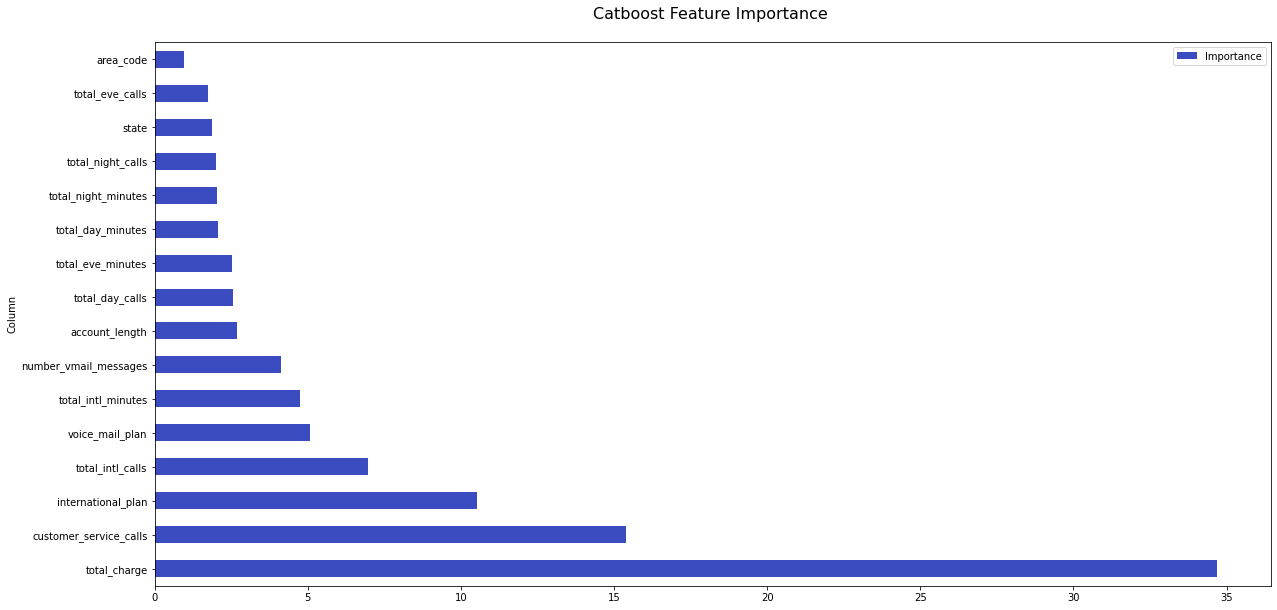

In [66]:
cat_feature = cat_feature[:25] # top 25 features
cat_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap = 'coolwarm')
plt.title('Catboost Feature Importance \n', fontsize=16)
plt.show()

## Adaboost Features

In [67]:
# Feature Importance
ada_feature = pd.DataFrame({'Importance': bdt.feature_importances_, 'Column': X.columns}) #create new dataframe
ada_feature = ada_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Adaboost Top 25 Features')
ada_feature[:25] #top 25 features

Adaboost Top 25 Features


,Importance,Column
10,0.087895,total_night_minutes
8,0.086463,total_eve_minutes
11,0.084917,total_night_calls
1,0.084878,account_length
15,0.083701,total_charge
6,0.081766,total_day_minutes
9,0.078960,total_eve_calls
7,0.078467,total_day_calls
0,0.077777,state
14,0.058545,customer_service_calls


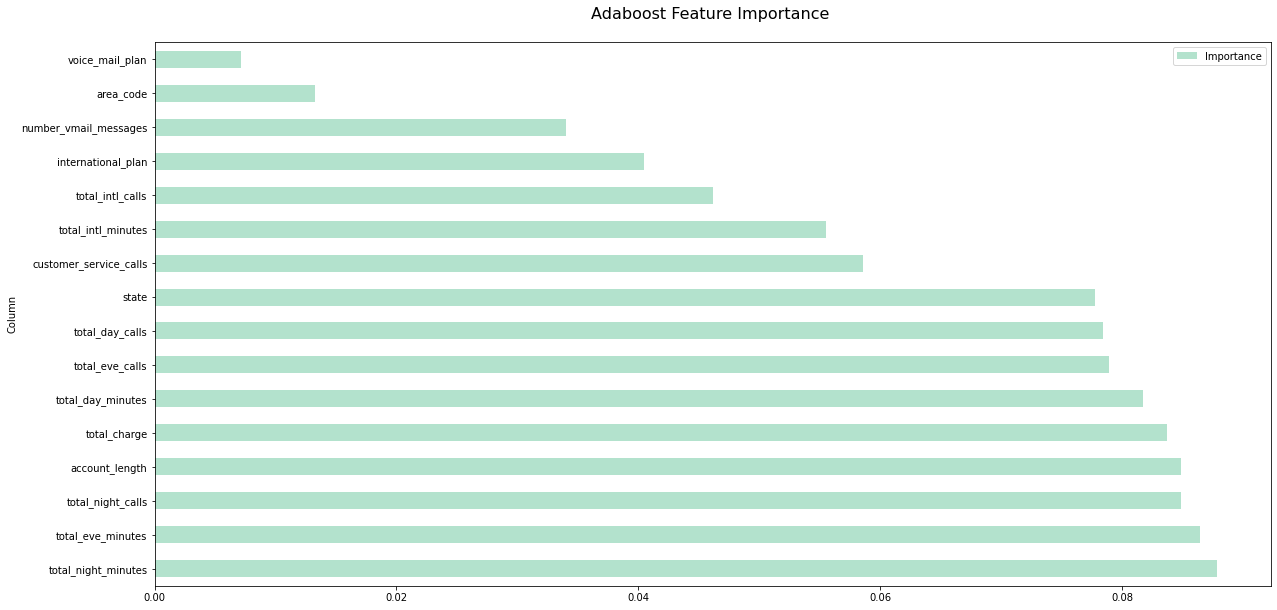

In [68]:
ada_feature = ada_feature[:25] # top 25 features
ada_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap= 'Pastel2')
plt.title('Adaboost Feature Importance \n', fontsize=16)
plt.show()

<div class="alert alert-success">

There is definitely overlap between the top 25 Adaboost and Catboost features but they carry different levels of importance. Both models do list total_charge as the most important feature to the model. 

</div>

## Random Forest Features

In [69]:
# Feature Importance
rf_feature = pd.DataFrame({'Importance': random_forest.feature_importances_, 'Column': X.columns}) #create new dataframe
rf_feature = rf_feature.sort_values(by='Importance', ascending=False) #display results highest to lowest
print('Random Forest Top 25 Features')
rf_feature[:25] #top 25 features

Random Forest Top 25 Features


,Importance,Column
15,0.343718,total_charge
14,0.144427,customer_service_calls
6,0.107490,total_day_minutes
3,0.090933,international_plan
4,0.044423,voice_mail_plan
13,0.042221,total_intl_calls
5,0.041650,number_vmail_messages
12,0.039297,total_intl_minutes
8,0.034649,total_eve_minutes
7,0.021274,total_day_calls


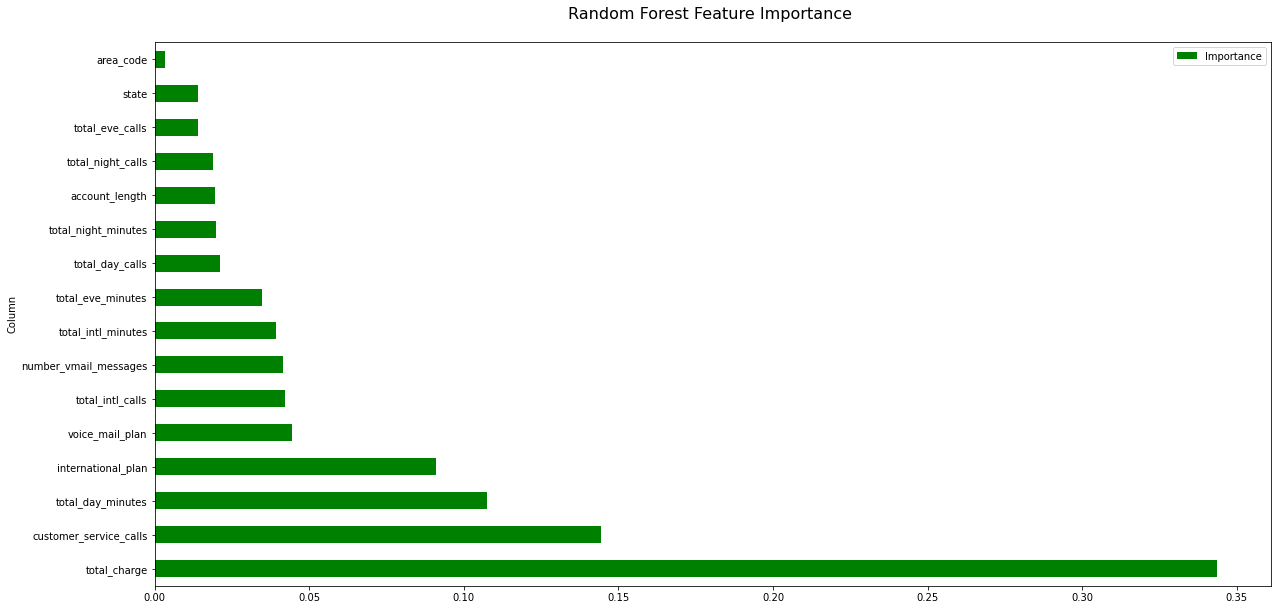

In [70]:
rf_feature = rf_feature[:25] #top 25 features
rf_feature.plot(kind='barh', x='Column', y='Importance', figsize=(20, 10), cmap= 'ocean')
plt.title('Random Forest Feature Importance \n', fontsize=16)
plt.show()

<div class="alert alert-success">

The Random Forest top 25 do illustrate overlap with both Catboost and Adaboost. Random Forest top 25 have more top rated similarities with Catboost features including total_charge and multiple "international" column features

</div>

## Overlap

In [71]:
cat = cat_feature.Column.unique() #creating lists from top 25 features in each classifier df
ada = ada_feature.Column.unique()
rf = rf_feature.Column.unique()

In [72]:
set(cat) & set(ada) & set(rf) # items appearing in all three lists

{'account_length',
 'area_code',
 'customer_service_calls',
 'international_plan',
 'number_vmail_messages',
 'state',
 'total_charge',
 'total_day_calls',
 'total_day_minutes',
 'total_eve_calls',
 'total_eve_minutes',
 'total_intl_calls',
 'total_intl_minutes',
 'total_night_calls',
 'total_night_minutes',
 'voice_mail_plan'}

There are 16 total items that appear in all three classifier feature lists. The most important feature in all three lists was **total_charge.** Top 5 features appearing in at least 2 of 3 lists are **customer_service_calls, international_plan and total_intl_calls.**

In [73]:
# ## Outliers

# # IQR Outlier Removal Function
# def iqr_outlier_rem(df, col_name):
#     start_len = len(df)
#     Q1 = df[col_name].quantile(0.25)
#     Q3 = df[col_name].quantile(0.75)
#     IQR = Q3-Q1 # Finding interquartile range
#     lower_threshold  = Q1-1.5*IQR
#     upper_threshold = Q3+1.5*IQR
#     new_df = df.loc[(df[col_name] > lower_threshold) & (df[col_name] < upper_threshold)]
#     print(f'There were {start_len - len(new_df)} outliers removed from {col_name}')
#     return new_df

# df = iqr_outlier_rem(df, 'account length')

In [74]:
# # Function to create two plots - normality / homoscedasticity
# def model_visual(residuals):
# # QQ Plot
#     '''Checking residuals for normality'''
#     fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
#     sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
#     axes[0].set_title('QQ Plot Normality Check', fontsize=20)
#     axes[0].set_xlabel('Theoretical Quantiles', fontsize=15)
#     axes[0].set_ylabel('Sample Quantiles', fontsize=14)
# # Homoscedasticity
#     '''Checking Homoscedasticity assumption'''
#     ax=axes[1]
#     ax.scatter(train['churn_True'], model.resid)
#     ax.axhline(0, color='red')
#     axes[1].set_title('Homoscedasticity Check', fontsize=20)
#     axes[1].set_xlabel('Price', fontsize=15)
#     axes[1].set_ylabel('Model Residuals', fontsize=14)
#     plt.show();
#     return model_visual

In [75]:
# # VIF Scores
# x = df.drop('churn_True', axis = 1)
# x = sm.add_constant(x)
# vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
# vif_results = pd.Series(dict(zip(x.columns, vif)))

# # Identifying VIF
# threshold = 6
# rem_vif = list(vif_results[vif_results > threshold].index)
# if 'const' in rem_vif:
#     rem_vif.remove('const')
# rem_vif